# Infant Notebook for Higgs --> ee ML Reco Analysis

To keep the boilerplate code at minimum, we will use the **AnaToolsManager** to load data, build data structures, and run post-processing algorithms. 

In [3]:
# Basic boilerplate imports
import numpy as np
import pandas as pd
import yaml, os, sys, re

# Visualization Tools
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
SOFTWARE_DIR = '/sdf/home/j/jdyer/lartpc_mlreco3d_v2_8_6' # Change this path to your software install
DATA_DIR = '/fs/ddn/sdf/group/neutrino/drielsma/icarus/reco/mpvmpr_ee/'

# Set software directory
sys.path.append(SOFTWARE_DIR)


In [5]:
# Load anatools config file
# Replace the source file with the correct path
DATA_PATH = DATA_DIR + 'mpvmpr_ee_reco.h5'
anaconfig = 'See_anaconfig.cfg' 
anaconfig = yaml.safe_load(open(anaconfig, 'r').read().replace('DATA_PATH', DATA_PATH))

print(DATA_PATH)


/fs/ddn/sdf/group/neutrino/drielsma/icarus/reco/mpvmpr_ee/mpvmpr_ee_reco.h5


In [6]:
# Initialize Anatools manager
from analysis.manager import AnaToolsManager

manager = AnaToolsManager(anaconfig)
manager.initialize()


Welcome to JupyROOT 6.22/08
Registered /fs/ddn/sdf/group/neutrino/drielsma/icarus/reco/mpvmpr_ee/mpvmpr_ee_reco.h5


In [7]:
# Forward a single image-worth of data (when running the full chain)
# data, result = manager.forward()

# Get entry number #ENTRY_NUM from HDF5 (when reading from HDF5)
ENTRY_NUM = 700
data, result = manager.forward(iteration=ENTRY_NUM)


In [8]:
manager.load_representations(data, result)

In [9]:
# Retrieving data structures: All the particles or interactions in given entry

particles          = result['particles'][0]       
truth_particles    = result['truth_particles'][0]
interactions       = result['interactions'][0]
truth_interactions = result['truth_interactions'][0]


In [8]:
for p in truth_particles:
    print(p)
    #print(p.match)
    
for p in particles:
    print(p)
    #print(p.match)
    

TruthParticle( Image ID=700 | Particle ID=0   | Semantic_type: Track       | PID: Muon     | Primary: 1  | Interaction ID: 0  | Size: 2487  | Volume: 0  | Match: [15])
TruthParticle( Image ID=700 | Particle ID=1   | Semantic_type: Shower      | PID: Electron | Primary: 1  | Interaction ID: 1  | Size: 3408  | Volume: 0  | Match: [5])
TruthParticle( Image ID=700 | Particle ID=2   | Semantic_type: Shower      | PID: Photon   | Primary: 1  | Interaction ID: 2  | Size: 1450  | Volume: 0  | Match: [0])
TruthParticle( Image ID=700 | Particle ID=3   | Semantic_type: Shower      | PID: Photon   | Primary: 1  | Interaction ID: 3  | Size: 801   | Volume: 0  | Match: [2])
TruthParticle( Image ID=700 | Particle ID=4   | Semantic_type: Track       | PID: Muon     | Primary: 1  | Interaction ID: 4  | Size: 878   | Volume: 0  | Match: [20])
TruthParticle( Image ID=700 | Particle ID=5   | Semantic_type: Delta       | PID: Electron | Primary: 0  | Interaction ID: 4  | Size: 15    | Volume: 0  | Match: [

In [11]:
for i in truth_interactions:
    #print(i.nu_id, i.id)
    #print(i)
    if i.id == 5:
        print(i)
    #print(i.match)
#    print(p.image_id)

for i in interactions:
#    print(i)
    if i.id == 3:
        print(i)
    #print(i.match)

TruthInteraction 5, Vertex: x=-90.24, y=47.19, z=775.90
--------------------------------------------------------------------
    * Particle 81: PID = 1, Size = 597, Match = [3] 
    * Particle 82: PID = 1, Size = 882, Match = [4] 

Interaction 3, Vertex: x=-1.00, y=-1.00, z=-1.00
--------------------------------------------------------------------
    * Particle 3: PID = 0, Size = 358, Match = [81] 
    * Particle 4: PID = 1, Size = 1131, Match = [82] 



## Visualization

In [10]:
from mlreco.visualization.plotly_layouts import white_layout
from mlreco.visualization.points import get_event_displays

In [11]:
# Example traces (3d scatterplots)
# Feel free to change the `color` or `mode` attribute to visualize different particle attributes. 
traces_reco = get_event_displays(truth_particles, #truth_interactions, #truth_particles
                                 color='id', 
                                 size=1, 
                                 mode='points', 
                                 colorscale='rainbow')
traces_true = get_event_displays(particles, #interactions, # particles
                                 color='id', 
                                 size=1, 
                                 mode='points', 
                                 colorscale='rainbow')

/tmp/ipykernel_2774182/271233808.py:11: DeprecationWarning:

white_layout is deprecated, use plotly_layout3d instead



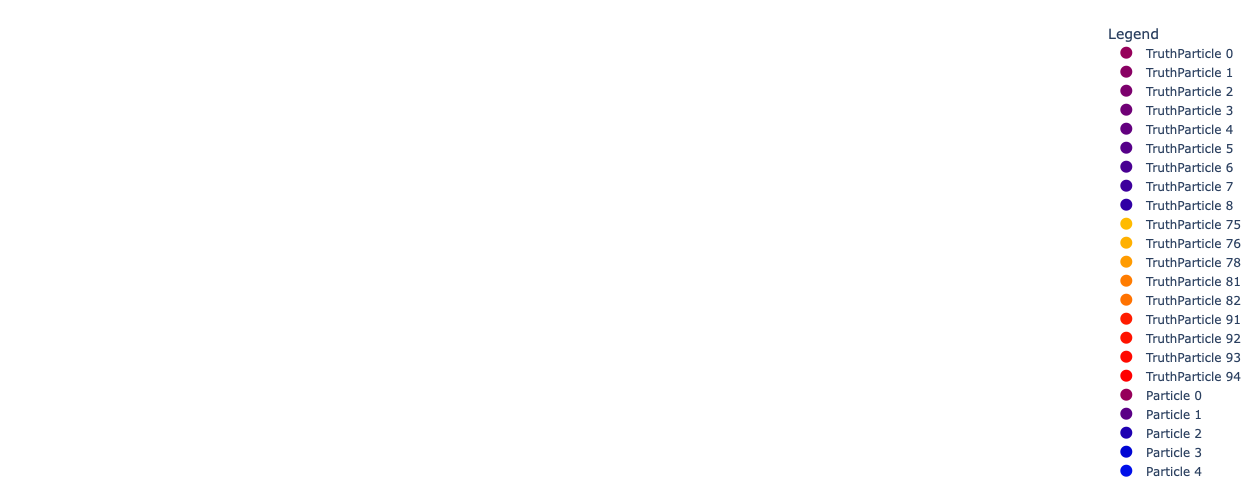

In [22]:
# Side-by-Side Event Display: TRUTH on LEFT; RECO on RIGHT

make_plots = True
if make_plots:
    fig = make_subplots(rows=1, cols=2,
                        specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                        horizontal_spacing=0.05, vertical_spacing=0.04)

    fig.add_traces(traces_reco, rows=len(traces_reco) * [1], cols=len(traces_reco) * [1])
    fig.add_traces(traces_true, rows=len(traces_true) * [1], cols=len(traces_true) * [2])

    fig.layout = white_layout()
    fig.update_layout(showlegend=True,
                      legend=dict(xanchor="left"),
                     autosize=True,
                     height=500,
                     width=1000,
                     margin=dict(r=20, l=20, b=20, t=20))
    iplot(fig)

## Generate Matched Pairs

In [12]:
from analysis.post_processing.evaluation.match import generate_match_pairs

Get matches for all true interactions and all true particles.

In [13]:
particle_matches = generate_match_pairs(truth_particles, particles)
particle_matches = particle_matches['matches_t2r'] # truth to reco

In [14]:
inter_matches = generate_match_pairs(truth_interactions, interactions)
inter_matches = inter_matches['matches_t2r'] # truth to reco (this is mislabeled in the code, but it truely is doing Truth --> Reco)

### Now consider only the [true] "Signal":
Make match pairs for true 2e MPV interactions, and the hard and soft true 2e MPV electron particles.

In [16]:
# For interactions, identify signal with .nu_id:

true_2e_inter_matches = []

true_hard_e_particle_id = []
true_soft_e_particle_id = []

for pair in inter_matches:
    if pair[0].nu_id == 1:
        true_2e_inter_matches.append(pair)
        e_energies = []
        e_ids = []
        assert(len(pair[0].particles) == 2)
        for part in pair[0].particles:
            e_energies.append(part.asis.energy_init())
            e_ids.append(part.id)
        am = np.argmax(np.array(e_energies))
        true_hard_e_particle_id.append(e_ids[am])
        true_soft_e_particle_id.append(e_ids[-(am+1)])
                    
true_hard_e_particle_matches = []
true_soft_e_particle_matches = []

# all lists end up being length one since I am doing this I am looping over interactions/particles in a single entry and there is only one MPV interaction per entry
            
for pair in particle_matches:
    if pair[0].id in true_hard_e_particle_id:
        true_hard_e_particle_matches.append(pair)
    elif pair[0].id in true_soft_e_particle_id:
        true_soft_e_particle_matches.append(pair)
        

In [17]:
# Sanity Check:

print(true_2e_inter_matches)

print(true_hard_e_particle_id)
print(true_soft_e_particle_id)

print(true_hard_e_particle_matches)
print(true_soft_e_particle_matches)

print('')

for i in truth_interactions:
    if i.id == 5:
        print(i)
        
for i in interactions:
    if i.id == 3:
        print(i)


[(TruthInteraction(id=5  , vertex=[-90.24   47.19  775.899], nu_id=1, size=1479, Topology=2e), None)]
[81]
[82]
[(TruthParticle(image_id=700, id=81, pid=1, size=597), Particle(image_id=700, id=3, pid=0, size=358))]
[(TruthParticle(image_id=700, id=82, pid=1, size=882), Particle(image_id=700, id=4, pid=1, size=1131))]

TruthInteraction 5, Vertex: x=-90.24, y=47.19, z=775.90
--------------------------------------------------------------------
    * Particle 81: PID = 1, Size = 597, Match = [3] 
    * Particle 82: PID = 1, Size = 882, Match = [4] 

Interaction 3, Vertex: x=-1.00, y=-1.00, z=-1.00
--------------------------------------------------------------------
    * Particle 3: PID = 0, Size = 358, Match = [81] 
    * Particle 4: PID = 1, Size = 1131, Match = [82] 



## Import Pre-made .csv files: 

For now I have made csv files for matched pairs: True --> Reco Interactions and Particles (no selection post processors included)

In [18]:
file = '/sdf/group/neutrino/jdyer/csu_workshop_2023/interactions.csv'
interactions_df = pd.read_csv(file, sep=',')

file = '/sdf/group/neutrino/jdyer/csu_workshop_2023/particles.csv'
particles_df = pd.read_csv(file, sep=',')


### Sanity Checks

In [30]:
interactions_df.columns
#interactions_df.shape
#interactions_df

Index(['Index', 'interaction_match_counts', 'true_interaction_id',
       'true_interaction_size', 'true_nu_id', 'true_volume_id',
       'true_num_primary_photons', 'true_num_primary_electrons',
       'true_num_primary_muons', 'true_num_primary_pions',
       'true_num_primary_protons', 'true_topology', 'true_truth_topology',
       'true_interaction_is_contained', 'true_vertex_x', 'true_vertex_y',
       'true_vertex_z', 'true_nu_interaction_type', 'true_nu_interaction_mode',
       'true_nu_current_type', 'true_nu_energy_init', 'true_matched',
       'reco_interaction_id', 'reco_interaction_size', 'reco_nu_id',
       'reco_volume_id', 'reco_num_primary_photons',
       'reco_num_primary_electrons', 'reco_num_primary_muons',
       'reco_num_primary_pions', 'reco_num_primary_protons', 'reco_topology',
       'reco_interaction_is_contained', 'reco_vertex_x', 'reco_vertex_y',
       'reco_vertex_z', 'reco_fmatched', 'reco_flash_time',
       'reco_flash_total_pE', 'reco_flash_id', 'r

In [35]:
print(int(interactions_df.query('Index == 700 and true_interaction_id == 5')['reco_interaction_id']))

3


In [40]:
print(particles_df.columns)
#particles_df

Index(['Index', 'particle_match_counts', 'true_particle_id',
       'true_particle_interaction_id', 'true_particle_type',
       'true_particle_is_contained', 'true_particle_nu_id',
       'true_particle_is_primary', 'true_particle_size',
       'true_particle_semantic_type', 'true_particle_start_point_x',
       'true_particle_start_point_y', 'true_particle_start_point_z',
       'true_particle_end_point_x', 'true_particle_end_point_y',
       'true_particle_end_point_z', 'true_particle_creation_process', 'true_p',
       'true_particle_px', 'true_particle_py', 'true_particle_pz',
       'true_truth_start_dir_x', 'true_truth_start_dir_y',
       'true_truth_start_dir_z', 'true_energy_init', 'true_energy_deposit',
       'true_children_counts_0', 'true_children_counts_1',
       'true_children_counts_2', 'true_children_counts_3',
       'true_children_counts_4', 'true_particle_start_dir_x',
       'true_particle_start_dir_y', 'true_particle_start_dir_z',
       'true_particle_end_dir_x

In [42]:
#mask = interactions_df['true_interaction_id'] == 5
df = particles_df.query('Index == 700 and true_particle_id == 81')
print(int(df['reco_particle_id']))

3


### How many particles are being reconstructed per true MPV interaction?

In [19]:
trueMPV_interactions_df = interactions_df.query('true_nu_id == 1')

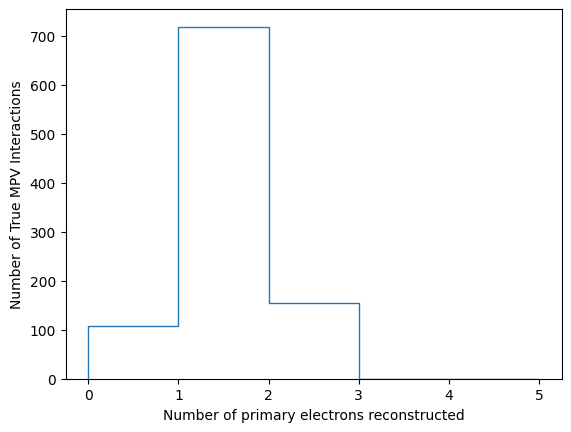

In [20]:
myBins = 5
plt.hist(trueMPV_interactions_df['reco_num_primary_electrons'], bins=myBins, range=(0,myBins), histtype='step')
plt.xlabel('Number of primary electrons reconstructed')
plt.ylabel('Number of True MPV Interactions')    
plt.show()

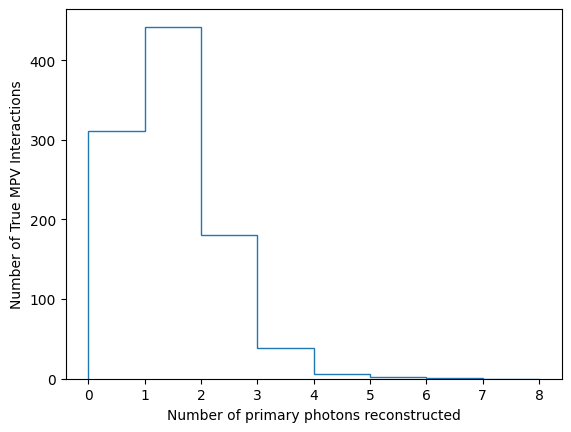

In [21]:
myBins = 8
plt.hist(trueMPV_interactions_df['reco_num_primary_photons'], bins=myBins, range=(0,myBins), histtype='step')
plt.xlabel('Number of primary photons reconstructed')
plt.ylabel('Number of True MPV Interactions')    
plt.show()

In [58]:
#truth_interactions_2e = truth_interactions.query('nu_id == 1')
truth_interactions[0].nu_id

truth_interactions_2e = []
for true_int in truth_interactions:
    if true_int.nu_id == 1:
        truth_interactions_2e.append(true_int)
        
for i in truth_interactions_2e:
    print(i)
    print('Matching interaction: ', i.match)
    print('Number of particles', i.num_particles)
    print('Number of primaries', i.num_primaries)
    print('Topology', i.topology)

TruthInteraction 5, Vertex: x=-90.24, y=47.19, z=775.90
--------------------------------------------------------------------
    * Particle 81: PID = 1, Size = 597, Match = [3] 
    * Particle 82: PID = 1, Size = 882, Match = [4] 

Matching interaction:  []
Number of particles 2
Number of primaries 2
Topology 2e


Goal:

Make a confusion matrix where I show reconstructed PID for leading and subleading true particle.

Use true --> reco matching.


# Exercises:

- Check True --> Reco match performance for final state electrons by leading/subleading energy
- Create confusion matrix for true electron PID reconstruction
- Investigate perfomance as functions of:
    - true opening angle between electrons
    - true ratio of electron energies
